# Reinforcement Learning

# Introduction

- "A gazelle calf struggles to its feet minutes after being born. Half an hour later it is running at 20 miles per hour." - Sutton and Barto

<img src="images/gazelle.jpeg" style="width: 600px;"/>

- Google's AlphaGo used deep reinforcement learning in order to defeat world champion Lee Sedol at Go.

<img src="images/go.jpg" style="width: 600px;"/>

# Goal

- Agent interacts dynamically with its environment, moves from one state to another. 
- Based on the actions taken by the agent, rewards are given. 
- Guidelines for which action to take in each state is called a policy.
- Try to efficiently find an optimal policy in which rewards are maximized.


<img src="images/RL_diagram.png" style="width: 600px;">

## This is Different from Supervised Learning

* Supervised Learning
  * "learning from examples provided by a knowledgeable external supervisor"
  * For any state that the agent may be in, the supervisor can supply enough relevant examples of the outcomes which result from similar states so that we may make an accurate prediction.

* Reinforcement Learning
  * No supervisor exists
  * Agent must learn from experience as it explores the range of possible states
  * Continuously update policy in response to new information.

# Examples

<table class="table table-bordered">
<font size="3">
  <tl>
    <th>
      agent
    </th>
    <th>
      environment
    </th>
    <th>
      actions
    </th>
    <th>
      rewards
    </th>
    <th>
      policy
    </th>
  </tl>
  <tr>
    <td>
      robot arm
    </td>
    <td>
      set of arm positions
    </td>
    <td>
      bend elbow, close hand, extend arm, etc.
    </td>
    <td>
      reward when door successfully opened
    </td>
    <td>
      most efficient set of movements to open door
    </td>
  </tl>
  <tr>
    <td>
      board game player
    </td>
    <td>
      set of all game configs.
    </td>
    <td>
      legal moves
    </td>
    <td>
      winning the game
    </td>
    <td>
      optimal strategy
    </td>
  </tr>
  <tr>
    <td>
      mouse
    </td>
    <td>
      maze
    </td>
    <td>
      running, turning
    </td>
    <td>
      cheese
    </td>
    <td>
      most direct path to cheese
    </td>
  </tr>
  <tr>
    <td>
      credit card company
    </td>
    <td>
      set of all customers in default
    </td>
    <td>
      set of collections actions
    </td>
    <td>
      cost for each attempt, reward for successful collection
    </td>
    <td>
      optimal strategy for debt collections
    </td>
  </tr>
  <tr>
    <td>
      marketing team
    </td>
    <td>
      sets of potential customers and ads that can be shown
    </td>
    <td>
      showing an ad to a potential customer
    </td>
    <td>
      cost of placing ad, value of customer's business
    </td>
    <td>
      optimal ad placement strategy
    </td>
  </tr>
  <tr>
    <td>
      call center
    </td>
    <td>
      status of each customer in queue
    </td>
    <td>
      connecting customers to representatives
    </td>
    <td>
      customer satisfaction
    </td>
    <td>
      optimal queueing strategy
    </td>
  </tr>
  <tr>
    <td>
      Website Designer
    </td>
    <td>
      set of possible layout options
    </td>
    <td>
      changing layout
    </td>
    <td>
      increased click-through rate
    </td>
    <td>
      ideal layout
    </td>
  </tr>
  </font>
</table>

# Exploration vs Exploitation

- In the absence of a Supervisor, the agent must explore the environment in order to gain information about rewards, while exploiting it's current information to maximize it's rewards.

- Balancing this tradeoff is a common theme

# Multi-Armed Bandits - A single state example

Multi-armed bandit problems are some of the simplest reinforcement learning (RL) problems to solve. We have an agent which we allow to choose actions, and each action has a reward that is returned according to a given, underlying probability distribution. The game is played over many episodes (single actions in this case) and the goal is to maximize your reward.

One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the explore-exploit dilemma.

* Given N different arms to choose from, each with an unknown reward, what strategy should we use to explore and learn the values of each arm, while exploiting our current knowledge to maximize profit?
* This is a very common approach for optimizing online marketing campaigns.
* This can be thought of as a single-state reinforcement learning problem

<img src="images/MAB.jpg" style="width: 400px;"/>



## Epsilon-greedy

- A fraction (1 - $\epsilon$) of the time, choose the arm with the largest estimated value (exploit)
- The other $\epsilon$ of the time, chose a random arm (explore)
- Tune $\epsilon$ in order to balance tradeoff

<img src="images/epsilongreedy.png" style="width: 400px;"/>

# Problem Setup

To get started, let’s describe the problem in a bit more technical detail. What we wish to do, is develop an estimate $Q_t(a)$:

$$Q_t(a)=E[R_n|A_n=a]$$

Where $Q_t(a)$ is the estimated, expected reward $R_n$, when action $A_n$ is taken at step n. We’re going to iteratively build a model that will converge towards the true value of each action. We’re going to use a Gaussian (normal) distribution for all of the underlying probability distributions that we’ll explore so that the mean corresponds to the true value (after all, given enough samples, we would expect our rewards to converge to the mean of the selected action).

The simplest way to proceed is to take the greedy action or take the action we think will maximize our reward at each time step. Another way of writing this is:
$$A_n=argmax_a(Q_n(a))$$

We can denote this maximum expectation or greedy action as A*n. This is the exploit side of our aforementioned explore-exploit dilemma, and it makes lots of sense if the goal is to maximize our reward. Of course, doing this repeatedly only works well once we have a good sense of our expected rewards for each actions (unless we get rather lucky). So, we need to figure out an algorithm that explores enough of our search space so that we can exploit the best actions.

# Average Reward Method
Before jumping into this, there’s one last concept to introduce. In typical RL applications, we may need hundreds of thousands of iterations, if not millions or more. It quickly becomes very computationally intensive to run simulations of these sorts and keep track of all that data just to calculate the average reward. To avoid this, we can use a handy formula so that all we need to track are two values: the mean and number of steps taken. If we need to calculate the mean at step n, m_n, we can do it with the previous mean, m_n−1​ and n as follows:
$$m_n=m_{n-1}+\frac{R_n-m_{n-1}}{n}$$

## Building a greedy k-Armed Bandit
We’re going to define a class called <b>eps_bandit </b> to be able to run our experiment. This class takes number of arms, k, epsilon value eps, number of iterations iter as inputs. We'll also define a term mu that we can use to adjust the average rewards of each of the arms.

### First the modules:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline


    epsilon-greedy k-bandit problem
    
    Inputs
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.


In [2]:
class eps_bandit:    
    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm _ this is the estimated action value
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
        # reward function is a normal distribution with mean mu and varaiance 1    
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

There are plenty of different ways to define this class. I did it so that once we initialize our problem, we just call the **run()** method and can examine the outputs. By default, the average rewards for each arm are drawn from a normal distribution around 0. Setting mu="sequence" will cause the rewards to range from 0 to k-1 to make it easy to know which actions provide the best rewards when evaluating the results and which actions were taken. Finally, you could also set your own average rewards by passing values to mu.

Let’s set up some comparisons using different values of ϵ\epsilonϵ. For each of these, we’ll set k=10, run 1,000 steps for each episode and run 1,000 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

## Let's run the bandit for three different epsilons

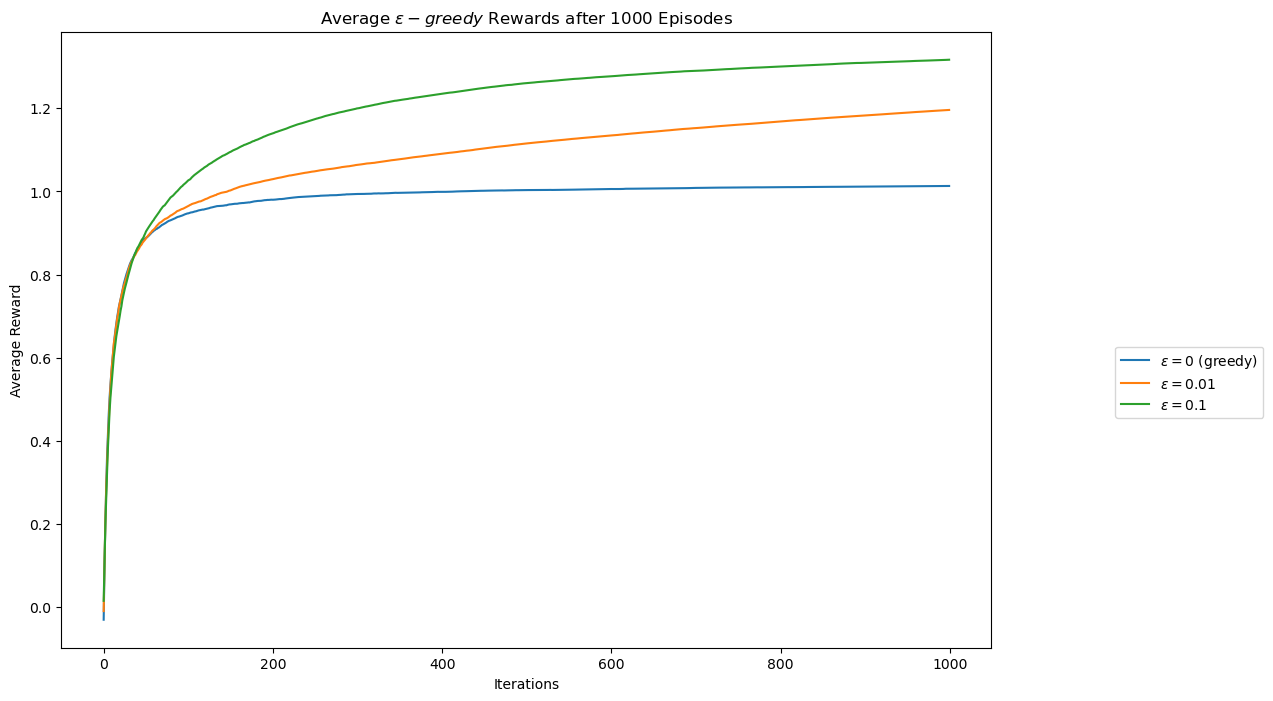

In [3]:
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here. Below, we can see the effect is clearer using the sequence argument, and can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.

## Now we count the average taken action
### To do so, we use sequence reward function to make the comparision tracktable 

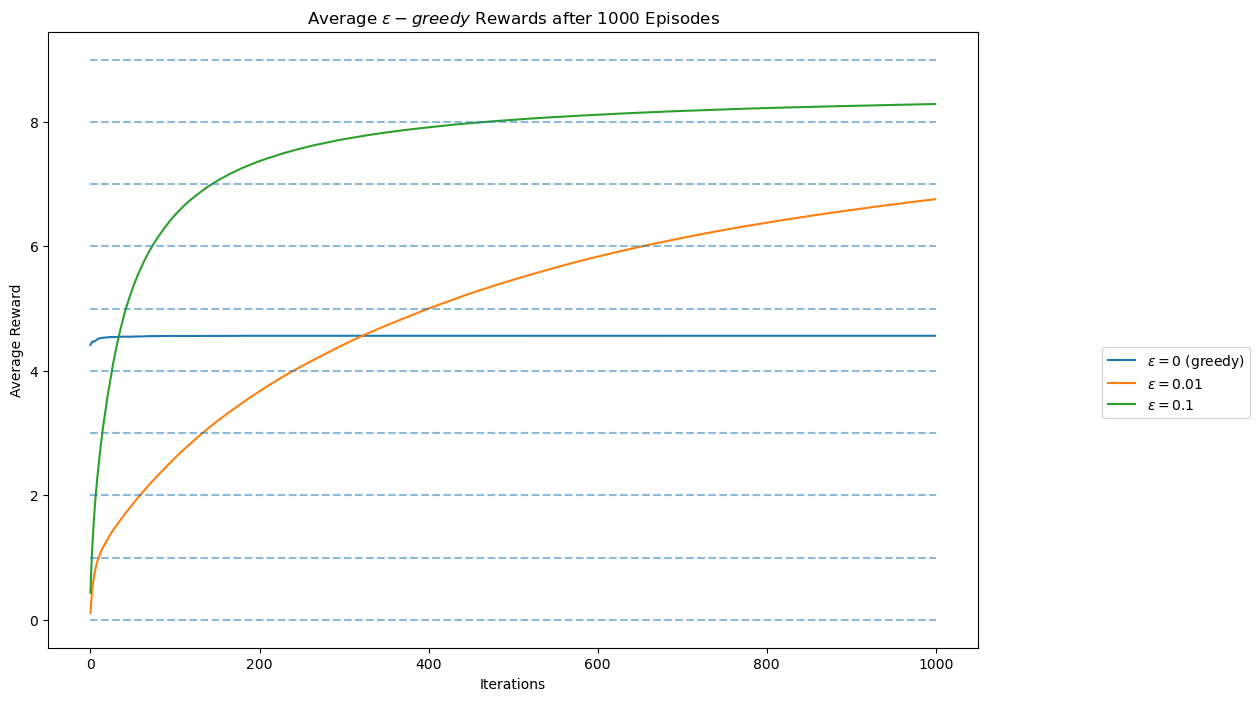

In [4]:
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

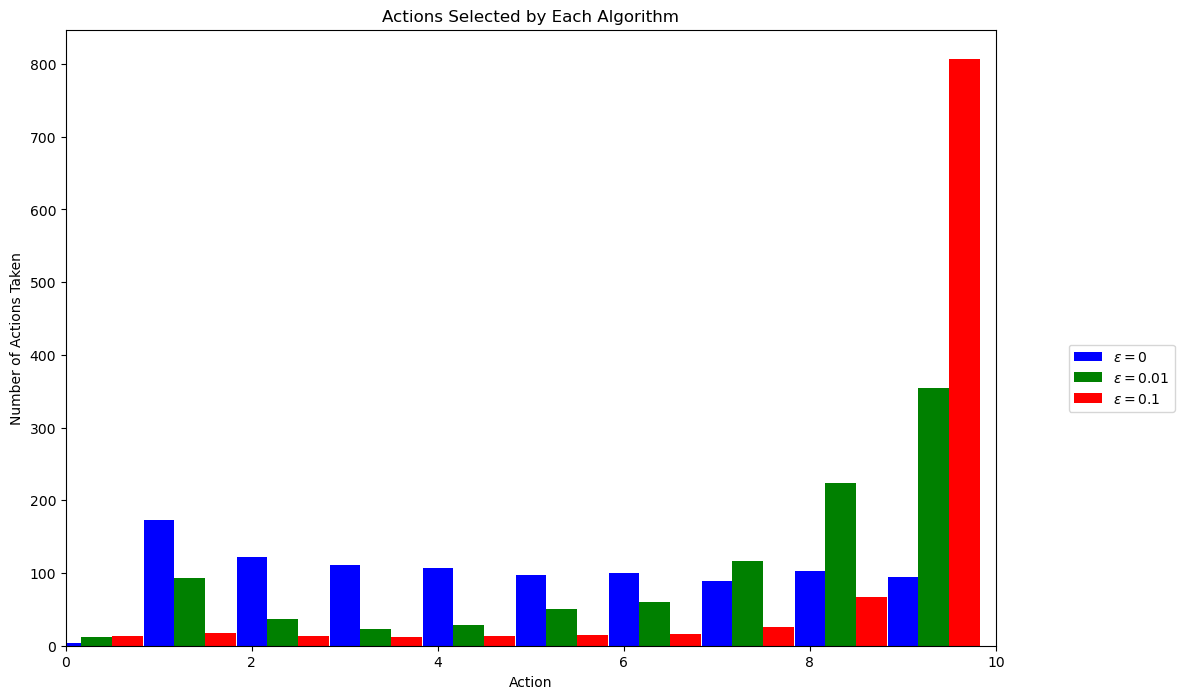

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.3885,17.2234,12.1884,11.0997,10.7000,9.7000,10.0000,8.9000,10.3000,9.5000
$\epsilon=0.01$,1.2600,9.3285,3.7077,2.3362,2.9024,5.0494,5.9633,11.6266,22.3197,35.5062
$\epsilon=0.1$,1.3634,1.6837,1.2914,1.1587,1.3273,1.4840,1.6785,2.6238,6.7142,80.6750


In [5]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, 
        width = 0.33, color='b', 
        label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection,
        width=0.33, color='g', 
        label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, 
        width=0.33, color='r',
        label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection,
                   eps_1_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', 
    '$\epsilon=0.01$', '$\epsilon=0.1$'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

Viewing the average selection of the algorithms, we see why the larger ϵ value performs well, it takes the optimal selection 80% of the time.

Play around with the different values of both ϵ and k to see how these results change. For example, decreasing the search space would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. Additionally, increasing the number of iterations will begin to benefit the lower value of ϵ because it will have less random noise.

## ϵ-Decay Strategies

The ϵ-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. It would be better for these to settle on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, n.
$$\epsilon(n)=\frac{1}{1+n\beta}$$

Where β<1 is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. In this case, we also include +1 in the denominator to prevent infinities from appearing. Given this, we can make a few small changes to our previous class of bandits to define an eps_decay_bandit class that works on the same principles.

In [6]:
class eps_decay_bandit:
    
    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

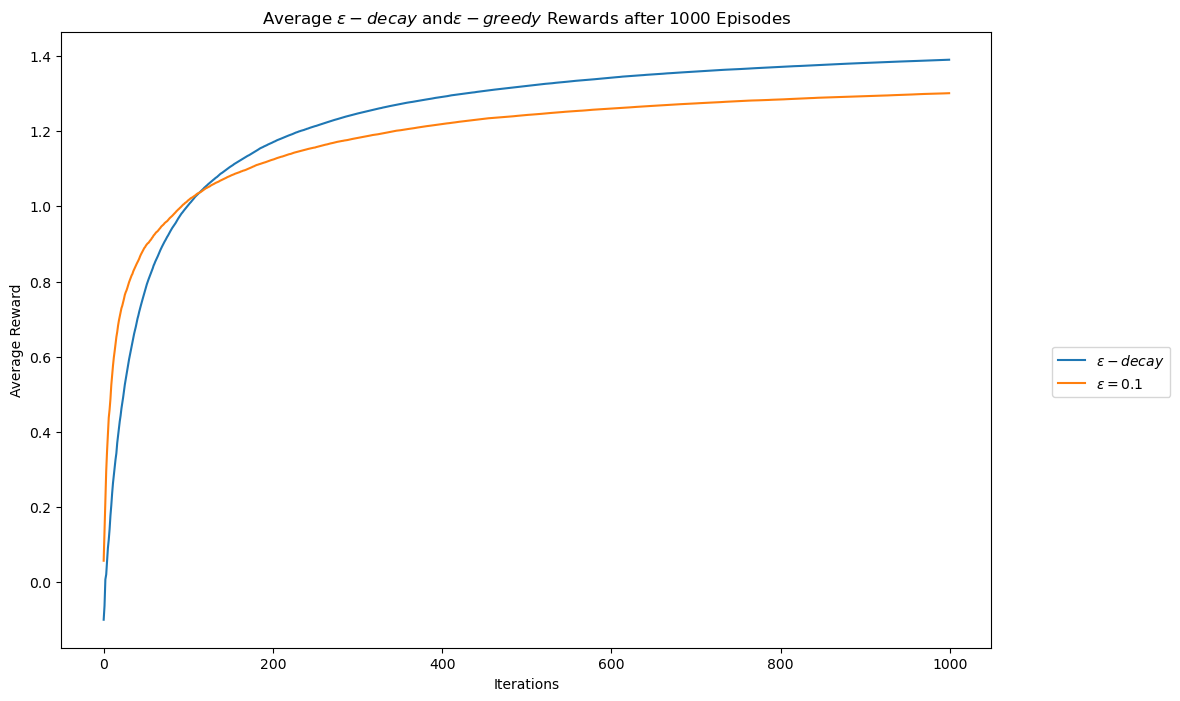

In [7]:
k = 10
iters = 1000
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())
    
    # Run experiments
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()

The ϵ-decay strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.

There’s one last method to balance the explore-exploit dilemma in k-bandit problems, optimistic initial values.

## Optimistic Initial Value

This approach differs significantly from the previous examples we explored because it does not introduce random noise to find the best action, A*_n​. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

For this implementation, we don’t need a new class. Instead, we can simply use our eps_bandit class and set ϵ=0 and provide high, initial values for the estimates. Also, I like to initialize the pull count for each arm as 1 instead of 0 to encourage slightly slower convergence and ensure good exploration.

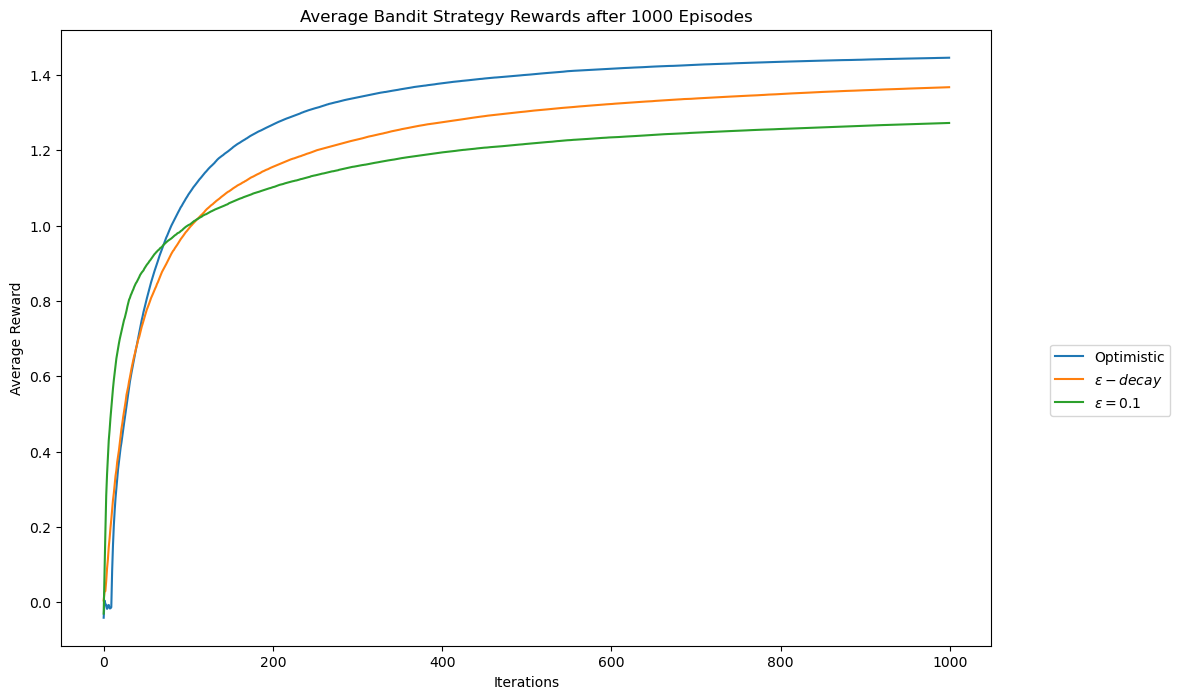

In [8]:
k = 10
iters = 1000
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
# Select initial values
oiv_init = np.repeat(5., k)
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())
    
    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    oiv_rewards = oiv_rewards + (
        oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + 
    str(episodes) + " Episodes")
plt.show()

We can see that, in this case, the optimistic initial value approach outperformed both our ϵ−greedy and the ϵ−decay algorithms. We can see too, the estimates the algorithm has for each of arms in the last episode.

In [9]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,3,-0.30,1.18
1,973,1.57,1.60
2,1,0.13,1.12
3,4,0.87,1.45
4,2,-0.66,1.21
5,3,-0.07,1.47
6,2,-0.81,1.05
7,2,-0.52,1.17
8,7,0.54,1.41
9,3,0.26,1.14


The estimates are far off the actual rewards in all cases except the one with 977 pulls. This highlights a lot of what we’ll be doing in reinforcement learning more generally. We don’t necessarily care about acquiring accurate representations of the environment we are interacting with. Instead, we intend to learn optimal behavior in those situations and seek to behave accordingly. This can open up a whole discussion about model-free versus model-based learning that we’ll have to postpone for another time.

## Upper Confidence Bound Bandit

The first bandit strategy we’ll examine is known as the Upper-Confidence-Bound method (UCB) which attempts to explore the action space based on the uncertainty or variance in a‘s value.

The selection criterion is given as:
$$A_n=argmax_a(Q_n(a)+c\sqrt{\frac{log(n)}{N_n(a)}})$$

In [10]:
class ucb_bandit:

    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
         
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
         
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt(
                (np.log(self.n)) / self.k_n))
             
        reward = np.random.normal(self.mu[a], 1)
         
        # Update counts
        self.n += 1
        self.k_n[a] += 1
         
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
         
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
         
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
             
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

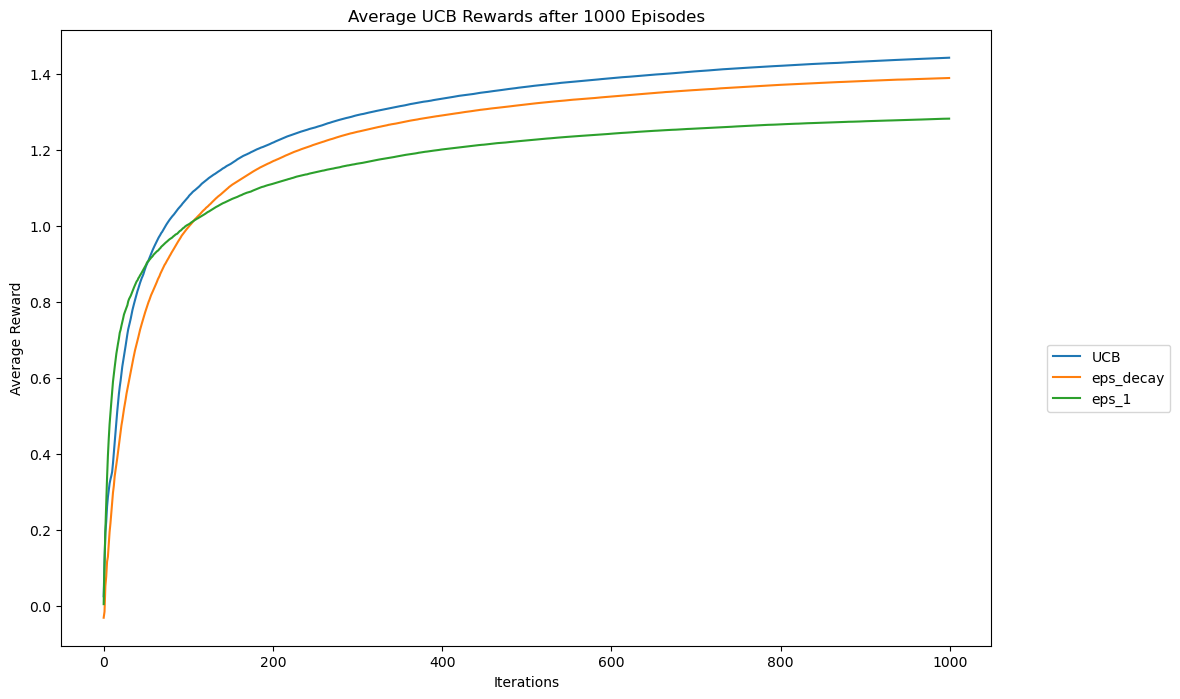

In [11]:
k = 10
iters = 1000
 
ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
 
episodes = 1000
# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    eps_decay = eps_decay_bandit(k, iters)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())
    # Run experiments
    ucb.run()
    eps_decay.run()
    eps_1.run()
     
    # Update long-term averages
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
    
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
     
plt.figure(figsize=(12,8))
plt.plot(ucb_rewards, label="UCB")
plt.plot(eps_decay_rewards, label="eps_decay")
plt.plot(eps_1_rewards, label="eps_1")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after "
          + str(episodes) + " Episodes")
plt.show()

## Gradient Bandit

Gradient algorithms take a different approach than the ones that we’ve seen thus far. This is a measure of the relative value of a given action over and above the other actions that are available. The algorithm learns a preference, $H_t(a)$, which causes it to select the higher preferenced actions more frequently. The preferences are calculated using softmax.
$$Pr(A_t=a)=\frac{e^{H_t(a)}}{\sum_{b=1}^ke^{H_t(a)}}=\pi_t(n)$$

There is a new term $\pi_t(n)$ which has been introduced here. This is essentially the probability of taking action 
a at time t. The algorithm is initialized with $H_0(a)=0$, so that initially, all actions have an equal probability of selection.
In this case, the algorithm doesn’t update the average of the rewards, but it updates the $H_t(a)=0$ value for each action using **stochastic gradient ascent**. Each time an action is taken, a reward is returned which is weighted by the probability of the action and the learning rate. This becomes the new value for $H_t(A_t)$ Because the probabilities are all relative to one another, they are all updated in turn. The procedure can be expressed as follows:
$$H_{t+1}(A_t)=H_{t}(A_t)+\alpha(R_t-\bar{R_t})(1-\pi_t(n))$$
$$H_{t+1}(a)=H_{t}(a)-\alpha(R_t-\bar{R_t})\pi_t(n)\forall a\neq A_t$$



In [12]:
def softmax(x):
    return np.exp(x - x.max()) / np.sum(np.exp(x - x.max()), axis=0)

In [13]:
class grad_bandit:
     
    def __init__(self, k, alpha, iters, mu='random'):
        # Number of arms
        self.k = k
        self.actions = np.arange(k)
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        # Initialize preferences
        self.H = np.zeros(k)
        # Learning rate
        self.alpha = alpha
         
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
             
    def softmax(self):
        self.prob_action = np.exp(self.H - np.max(self.H)) \
            / np.sum(np.exp(self.H - np.max(self.H)), axis=0)
         
    def pull(self):
        # Update probabilities
        self.softmax()
        # Select highest preference action
        a = np.random.choice(self.actions, p=self.prob_action)
             
        reward = np.random.normal(self.mu[a], 1)
         
        # Update counts
        self.n += 1
        self.k_n[a] += 1
         
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
         
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
         
        # Update preferences
        self.H[a] = self.H[a] + \
            self.alpha * (reward - self.mean_reward) * (1 -
                self.prob_action[a])
        actions_not_taken = self.actions!=a
        self.H[actions_not_taken] = self.H[actions_not_taken] - \
            self.alpha * (reward - self.mean_reward)* self.prob_action[actions_not_taken]
             
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
             
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        self.H = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

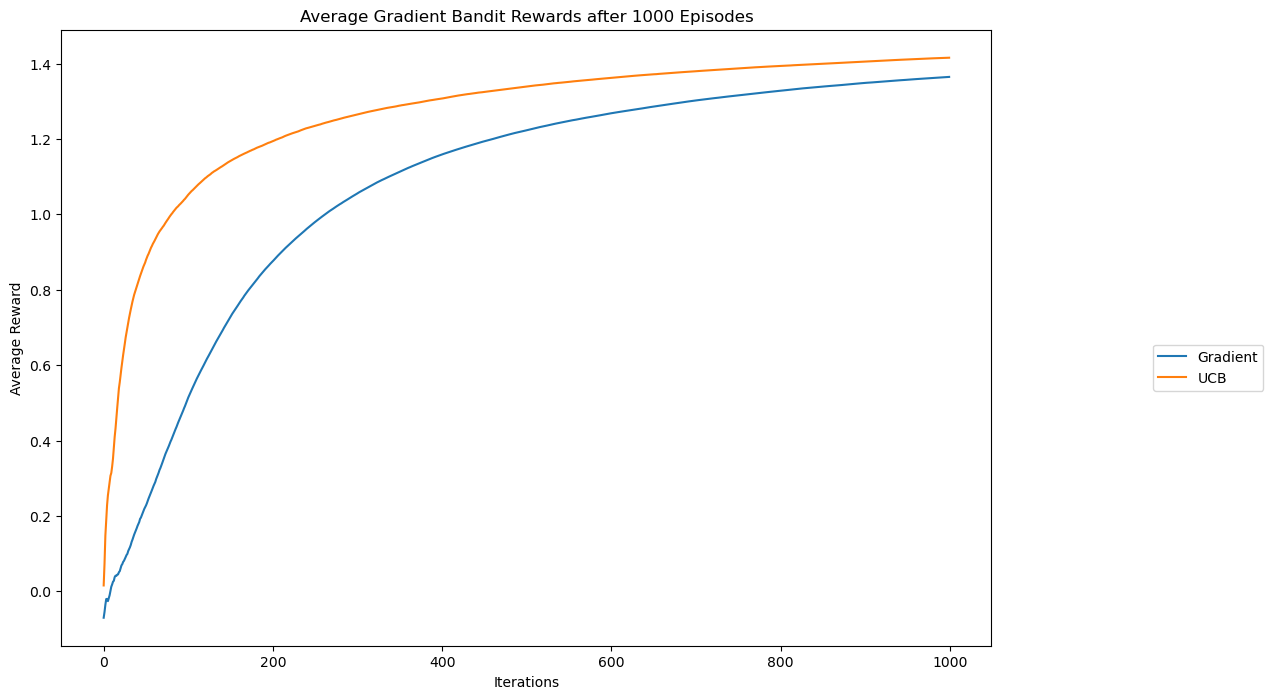

In [14]:
k = 10
iters = 1000
# Initialize bandits
grad = grad_bandit(k, 0.1, iters, mu='random')
ucb = ucb_bandit(k, 2, iters, mu=grad.mu)
ucb.mu = grad.mu
 
ucb_rewards = np.zeros(iters)
grad_rewards = np.zeros(iters)
opt_grad = 0
opt_ucb = 0
 
episodes = 1000
# Run experiments
for i in range(episodes):
    # Reset counts and rewards
    grad.reset('random')
    ucb.reset()
    ucb.mu = grad.mu
     
    # Run experiments
    grad.run()
    ucb.run()
     
    # Update long-term averages
    grad_rewards = grad_rewards + (
        grad.reward - grad_rewards) / (i + 1)
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
     
    # Count optimal actions
    opt_grad += grad.k_n[np.argmax(grad.mu)]
    opt_ucb += ucb.k_n[np.argmax(ucb.mu)]
     
plt.figure(figsize=(12,8))
plt.plot(grad_rewards, label="Gradient")
plt.plot(ucb_rewards, label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Gradient Bandit Rewards after "
          + str(episodes) + " Episodes")
plt.show()

We see that the UCB bandit outperformed the gradient bandit over the entire range, however, looking a bit deeper, we can see that the gradient bandit performed much better and more consistently once it learned.

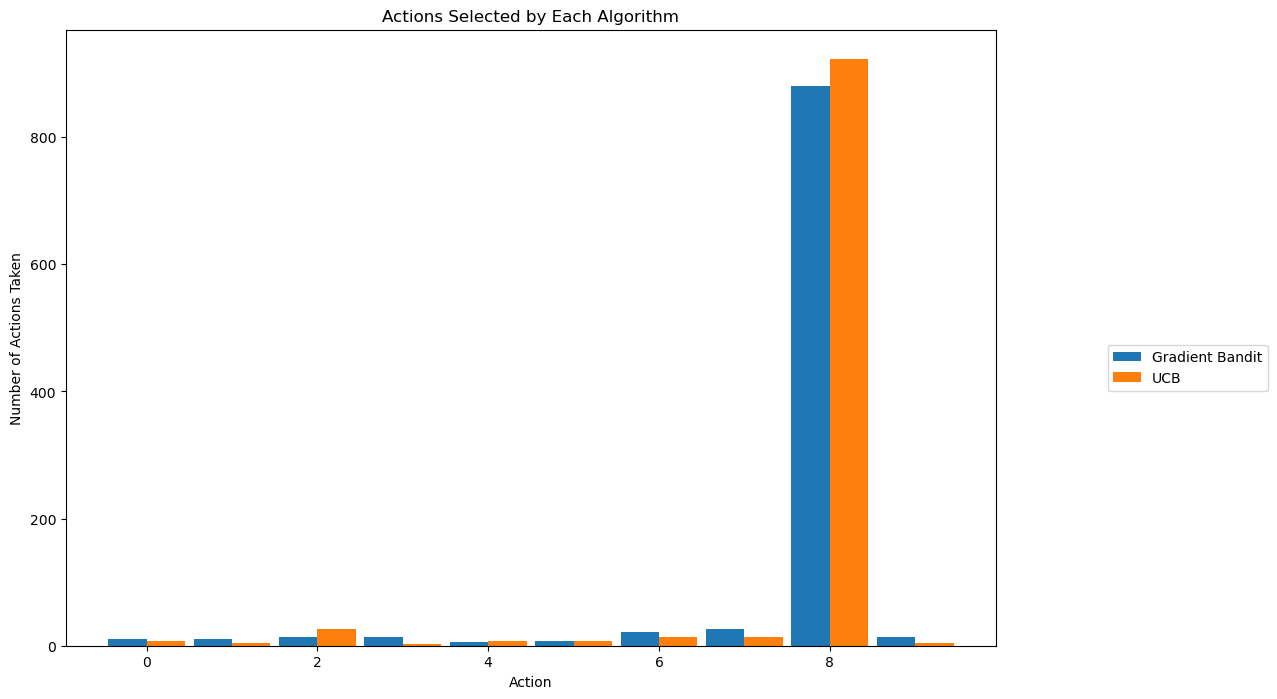

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
Grad,1.0,1.00,1.30,1.3,0.60,0.70,2.10,2.60,88.10,1.30
UCB,0.7,0.50,2.60,0.2,0.70,0.80,1.40,1.30,92.30,0.50
Expected Reward,-0.6,-0.29,0.37,-0.9,-0.69,-0.92,0.41,0.39,1.44,-0.58


In [15]:
width = 0.45
bins = np.linspace(0, k-1, k) - width/2
 
plt.figure(figsize=(12,8))
plt.bar(bins, grad.k_n,
        width=width, 
        label="Gradient Bandit")
plt.bar(bins+0.45, ucb.k_n,
        width=width, 
        label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()
 
opt_per = np.array([grad.k_n, ucb.k_n]) / iters * 100
df = pd.DataFrame(np.vstack([opt_per, 
    grad.mu.reshape(-1, 1).T.round(2)]), 
    index=["Grad", "UCB", "Expected Reward"],
    columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

The gradient bandit outperformed the UCB approach on the final 1,000 pull run selecting the optimal action (action 3 in this case) 62.9% of the time versus 19.7%. Although the gradient-based approach wasn’t able to perform as well over the entire time horizon, notice that it was much more successful in differentiating the best action from the second best action than the UCB bandit, which spent 0.9% more of its actions selecting 2 instead of 3.

The gradient bandit performed comparably to the UCB bandit, although underperforming it for all episodes, it remains important to understand because it relates closely to one of the key concepts in machine learning: stochastic gradient ascent/descent (see section 2.8 of Reinforcement Learning: An Introduction for a derivation of this). This makes up the backbone of numerous optimization strategies as the algorithm adjusts weights in the direction of minimum or maximum gradient (depending on what is being optimized for). This has an especially powerful analog in reinforcement learning known as policy gradients which we’ll cover in a future article.

## Nonstationary Bandits

All of the environments we’ve examined have been stationary environments: once the returns are selected, the means remain constant. Most real-world applications don’t follow this pattern. Instead, the rewards drift over time meaning that the underlying reward function is dynamic. This behavior can cause your bandit’s, once optimal behavior, to drift over time as the action degrades or other strategies become more beneficial. To deal with this, we can introduce a step-size parameter, $\beta$ to the equation where 0<$\beta$≤1. The parameter $\beta$, weights more recent observations more heavily than older observations and acts like a discount factor stretching back into the past. This leads to the result where our $Q$ estimate can be written as:
$$Q_{n+1}=(1-\beta)^nQ_1+\sum_{i=1}^n\beta(1-\beta)^{n-1}R_i$$

This is essentially a weighted average of all the past rewards and our initial estimate for Q and can be implemented in a similar update procedure. To see this in action, let’s define our mean reward as a function of the total number of pulls. As such, the mean reward will drift with each action n. We’ll make it a non-linear function as well just to make it a bit more interesting as the rewards shift.

We’ll define a new bandit class, nonstationary_bandits with the option of using either ϵ-decay or ϵ-greedy methods. Also note, that if we set our β=1, then we are implementing a non-weighted algorithm, so the greedy move will be to select the highest average action instead of the highest weighted action. Check back with the last post if you need a refresher on the ideas that underpin these bandit types.

In [16]:
class nonstationary_bandit:
     
    def __init__(self, k, beta, epsilon, iters, Q_init=None, c='random'):
        # Number of arms
        self.k = k
        self.actions = np.arange(k)
        self.epsilon = epsilon
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
         
        # Initialize estimates
        if not Q_init:
            self.Q_init = np.zeros(k)
        else:
            self.Q_init = Q_init
             
        self.Q = self.Q_init.copy()
        # Step size parameter
        self.beta = beta
         
        if type(c) == list or type(c).__module__ == np.__name__:
            # User-defined averages            
            self.c = np.array(c)
        elif c == 'random':
            # Draw value from normal distribution
            self.c = np.random.normal(0, 1, k)
        elif c == 'sequence':
            # Increase the mean for each arm by one
            self.c = np.linspace(0, k-1, k)
             
    def pull(self):        
        # Select highest average
        if self.beta == 1:
            a = np.argmax(self.k_reward)
        else:
            a = np.argmax(self.Q)
        # Possibly take random action
        p = np.random.rand()
        if self.epsilon == 'decay':
            if p < 1 / (1 + self.n):
                a = np.random.choice(self.k)
        else:
            if p < self.epsilon:
                a = np.random.choice(self.k)
         
        exp_reward = self.c[a] + np.sin(self.n * np.pi /
            self.iters + self.c[a])
         
        reward = np.random.normal(exp_reward, 1)
         
        # Update counts
        self.n += 1
        self.k_n[a] += 1
         
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
         
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
         
        # Update Q-values
        self.Q[a] += self.beta * (reward - self.Q[a])
         
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
             
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)

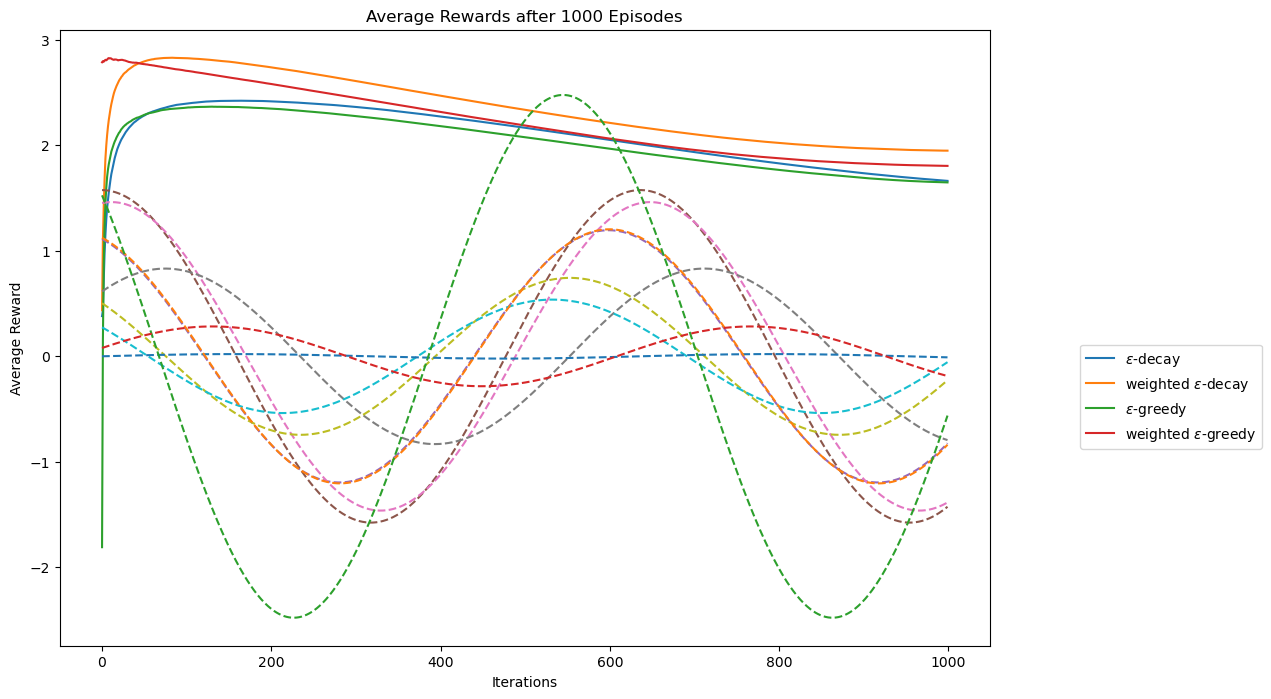

In [17]:
k = 10
iters = 1000
# Initialize bandits
ns_eps_decay = nonstationary_bandit(k, 1, 'decay', iters)
ns_eps_decay_weighted = nonstationary_bandit(
    k, 0.1, 'decay', iters, c=ns_eps_decay.c)
ns_eps_greedy = nonstationary_bandit(
    k, 1, 0.1, iters, c=ns_eps_decay.c)
ns_eps_greedy_weighted = nonstationary_bandit(
    k, 0.1, 0.1, iters, c=ns_eps_decay.c)
 
ns_eps_decay_rewards = np.zeros(iters)
ns_eps_decay_w_rewards = np.zeros(iters)
ns_eps_greedy_rewards = np.zeros(iters)
ns_eps_greedy_w_rewards = np.zeros(iters)
 
episodes = 1000
# Run experiments
for i in range(episodes):
    # Reset counts and rewards
    ns_eps_decay.reset()
    ns_eps_decay_weighted.reset()
    ns_eps_greedy.reset()
    ns_eps_greedy_weighted.reset()
     
    # Run experiments
    ns_eps_decay.run()
    ns_eps_decay_weighted.run()
    ns_eps_greedy.run()
    ns_eps_greedy_weighted.run()
     
    # Update long-term averages
    ns_eps_decay_rewards = ns_eps_decay_rewards + (
        ns_eps_decay.reward - ns_eps_decay_rewards) / (i + 1)
    ns_eps_decay_w_rewards = ns_eps_decay_w_rewards + (
        ns_eps_decay_weighted.reward -
        ns_eps_decay_w_rewards) / (i + 1)
    ns_eps_greedy_rewards = ns_eps_greedy_rewards + (
        ns_eps_greedy.reward - ns_eps_greedy_rewards) / (i + 1)
    ns_eps_greedy_w_rewards = ns_eps_greedy_w_rewards + (
        ns_eps_greedy_weighted.reward -
        ns_eps_greedy_w_rewards) / (i + 1)
     
x = np.arange(iters) * np.pi / iters
plt.figure(figsize=(12,8))
plt.plot(ns_eps_decay_rewards, 
    label=r"$\epsilon$-decay")
plt.plot(ns_eps_decay_w_rewards, 
    label=r"weighted $\epsilon$-decay")
plt.plot(ns_eps_greedy_rewards, 
    label=r"$\epsilon$-greedy")
plt.plot(ns_eps_greedy_w_rewards, 
    label=r"weighted $\epsilon$-greedy")
for c in ns_eps_decay.c:
    plt.plot(c * np.sin(x * np.pi + c), '--')
 
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Rewards after "
          + str(episodes) + " Episodes")
plt.show()

The solid lines indicate the average rewards of the different non-stationary bandit algorithms that we implemented above, while the dashed lines show the change in expected rewards over time.

The discounting helps the weighted ϵ algorithms outperform their non-weighted counterparts. Overall, none are spectacular, but it is very difficult to maintain high returns when the underlying reward functions are changing; it creates an aura of uncertainty.